In [33]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

# Math
import math

# Tools for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation tool for ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [34]:
df = sm.datasets.fair.load_pandas().data

In [35]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [36]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [37]:
df['had_affair'] = df['affairs'].apply(affair_check)

In [38]:
df['had_affair'].loc[df['had_affair']==0].count()

4313

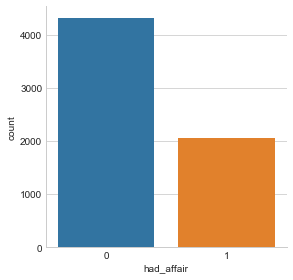

In [39]:
sns.factorplot('had_affair', data=df, kind='count')

In [40]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


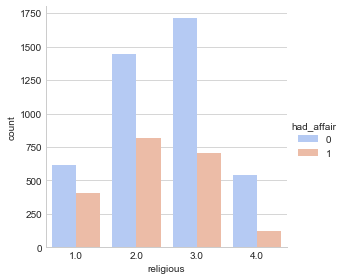

In [41]:
sns.factorplot('religious', data=df, hue='had_affair', kind='count', palette='coolwarm')

In [44]:
# Create dummy vairables for the categorical values
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [45]:
# Name the columns of the dummy variables and concatenate together
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']
dummies = pd.concat([occ_dummies, hus_occ_dummies],axis=1)

In [49]:
# Drop unedited categorical columns and target column from original df and concat the dummy columns to this
X = df.drop(['occupation', 'occupation_husb', 'had_affair'], axis=1)
X = pd.concat([X, dummies], axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [57]:
# Y value equal to the target class of 'had_affair'
Y = df.had_affair

In [58]:
# Drop occ1 and hocc1 to avoid multilinearity and drop affairs
X.drop(['occ1'],axis=1, inplace=True)
X.drop(['hocc2'],axis=1, inplace=True)
X.drop(['affairs'],axis=1,inplace=True)

In [59]:
# Flatten the array
Y = np.ravel(Y)

In [61]:
# Fit the values to the Logistic Regression model and get the score of the model(accuracy)
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

0.7260446120012567

In [62]:
# Get the percentage of women that had an affair
Y.mean()

0.3224945020420987

In [64]:
'''This shows if we were to just assume all women had no affairs the accuracy of that model would be 1-0.32 (=68%) 
so our model is not much more accurate'''

'This shows if we were to just assume all women had no affairs the accuracy of that model would be 1-0.32 (=68%) \nso our model is not much more accurate'

In [85]:
# Combine the coefficients and their titles into a dataframe to see their values
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))
coeff_df

,0,1
0,rate_marriage,[-0.6967646954497261]
1,age,[-0.055637288169986136]
2,yrs_married,[0.10331970400043067]
3,children,[0.019242462903291076]
4,religious,[-0.36781659557272245]
5,educ,[0.009165230258459037]
6,occ2,[0.3161348917785735]
7,occ3,[0.6265121076861675]
8,occ4,[0.36073768073868656]
9,occ5,[0.958094721435353]


In [86]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [87]:
# Build the training model
log_model2 = LogisticRegression()
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
# Run a prediction using the X test dataset
class_predict = log_model2.predict(X_test)
# Compare the testing data with the prediction
print(metrics.accuracy_score(Y_test,class_predict))

0.7154522613065326
